In [47]:
import pandas as pd 
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('wine.csv')

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
encoder = LabelEncoder()

In [17]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [21]:
pd.DataFrame(df['quality'])

2

In [28]:
df['quality']= encoder.fit_transform(df['quality'])

In [30]:
X,y = df.iloc[:,:-1],df.iloc[:,-1:]

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7)

X_val,X_test , y_val,y_test = train_test_split(X_test,y_test,train_size=0.5)

In [42]:
scaler = StandardScaler()


In [43]:
X_train_scaled = scaler.fit_transform(X_train)

In [46]:
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [49]:
Layers = [tf.keras.Input(shape=(X_train_scaled.shape[1],)),
          tf.keras.layers.Dense(64,activation='relu',name='hidden1'),
          tf.keras.layers.Dense(32,activation='relu',name='hidden2'),
          tf.keras.layers.Dense(1,activation='sigmoid',name='output')]

In [54]:
model = tf.keras.models.Sequential(Layers)

In [53]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden1 (Dense)                 │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [56]:
history = model.fit(
    X_train_scaled,
    y_train,
    validation_data=(X_val_scaled,y_val),
    epochs = 20,
    
)

Epoch 1/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6868 - loss: 0.6120 - val_accuracy: 0.7083 - val_loss: 0.5610
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7480 - loss: 0.5393 - val_accuracy: 0.7000 - val_loss: 0.5461
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7502 - loss: 0.5179 - val_accuracy: 0.7000 - val_loss: 0.5407
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7439 - loss: 0.5234 - val_accuracy: 0.7000 - val_loss: 0.5345
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7301 - loss: 0.5210 - val_accuracy: 0.7125 - val_loss: 0.5272
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7599 - loss: 0.4897 - val_accuracy: 0.7250 - val_loss: 0.5194
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7499 - loss: 0.5238 - val_accuracy: 0.7250 - val_loss: 0.5193
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7411 - loss: 0.4997 - val_accuracy: 0.7292 - val_loss

In [61]:
history_df = pd.DataFrame(history.history)


In [63]:
import matplotlib.pyplot as plt

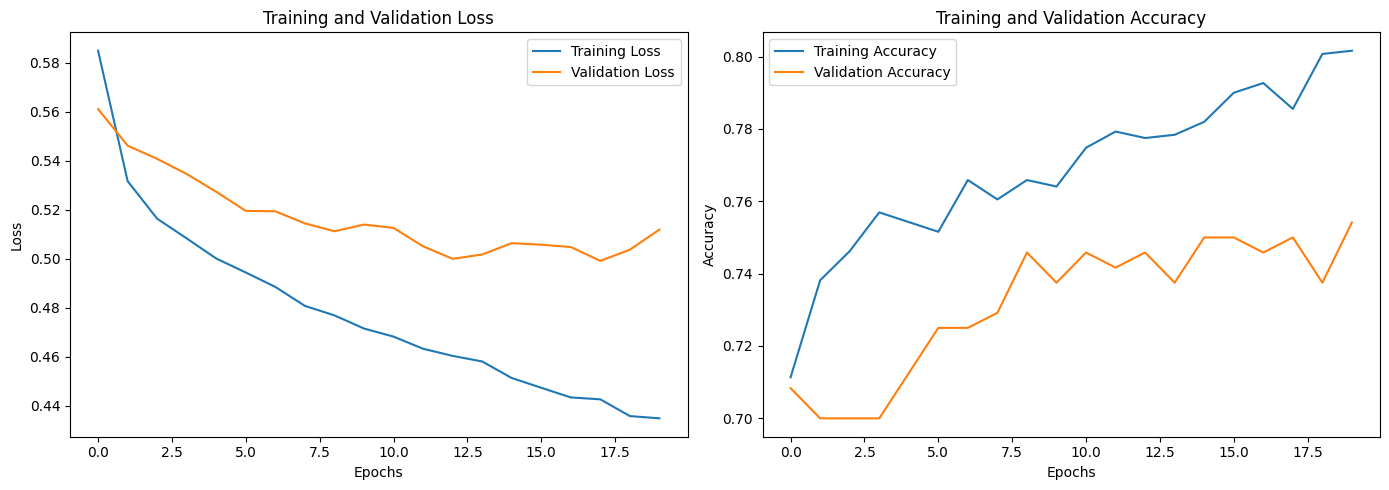

In [64]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Training and Validation Accuracy
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [65]:
test_loss,test_accuracy = model.evaluate(X_test_scaled,y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.7491 - loss: 0.4798


In [66]:
print(test_loss,test_accuracy)

0.46099698543548584 0.7791666388511658
